# Linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\ANJALI\Documents\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

boston_data=load_boston()
boston_data['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [4]:
#Here we donot have column names getting column names from boston dataset
#Independent variables
indep_vars=pd.DataFrame(boston_data['data'],columns=boston_data.feature_names)
indep_vars

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
#DEPENDENT VARIABLES
dep_vars=pd.DataFrame(boston_data['target'], columns=['HousePrice'])
dep_vars

,HousePrice
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
#Concatenating the data independent and dependent variables to analyze
full_data=pd.concat([indep_vars,dep_vars],axis=1)

In [7]:
#Checking the first five dataset in final dataset
full_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
#To know what each column is about
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#Now from here we start our predictions

In [10]:
#Dividing the data into X and Y variables

In [11]:
X=full_data.drop(['HousePrice'], axis=1)
Y=full_data[['HousePrice']]

In [12]:
#First five elemenets in X
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
#First five elements in Y
Y.head()

,HousePrice
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#Analysing what type of relationship exist between all the independent variable and dependent variable
#plotting a scatter graph for the same

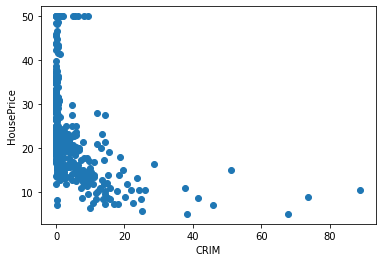

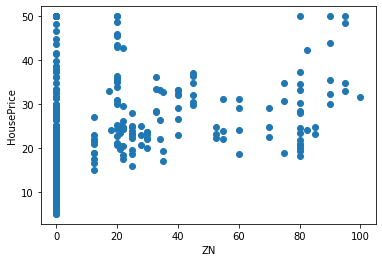

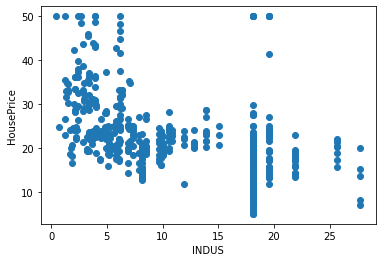

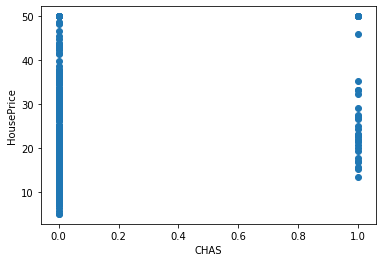

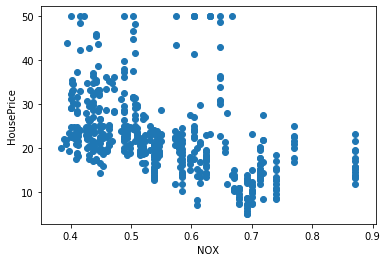

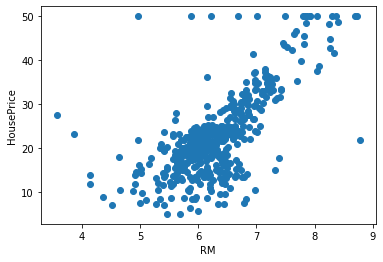

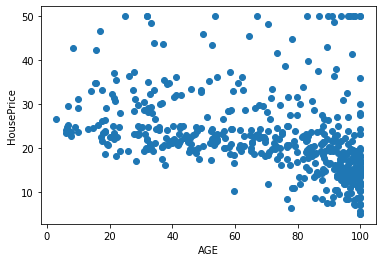

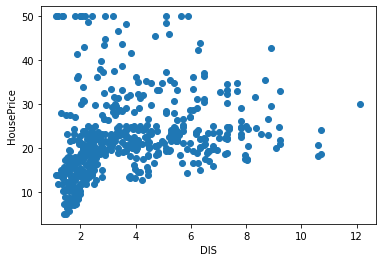

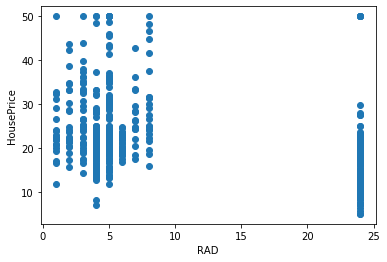

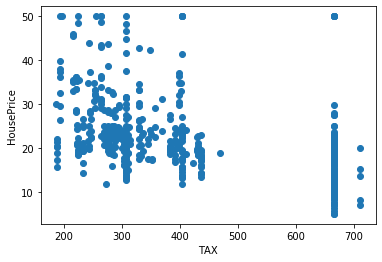

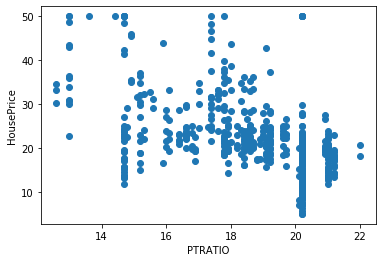

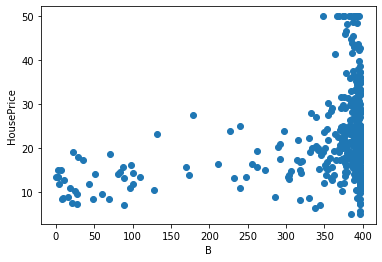

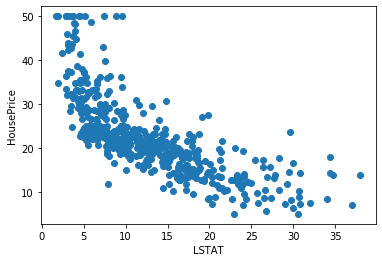

In [14]:
for i in X.columns:
    plt.scatter(X[i], Y['HousePrice'])
    plt.xlabel(i)
    plt.ylabel("HousePrice")
    plt.show()    

#After observing through graph we can see that RM,LSTAT,AGE,CRIM shows some type of linear relationship as here either the HousePrice increase or decrease w.r.t variables but others donot show any such relationship and it is difficult to predict the accurate HousePrice with that data

#Analysing the relation between the variables in X with Y
#Here I am choosing only 4 variables and taking a closer look to watch if there is any linear relationship between the independent variable and dependent variable
#Independent variables I hae taken here are:
RM, LSTAT, AGE, CRIM
#Dependent Variable:
House price

<class 'numpy.ndarray'>
(2, 2)


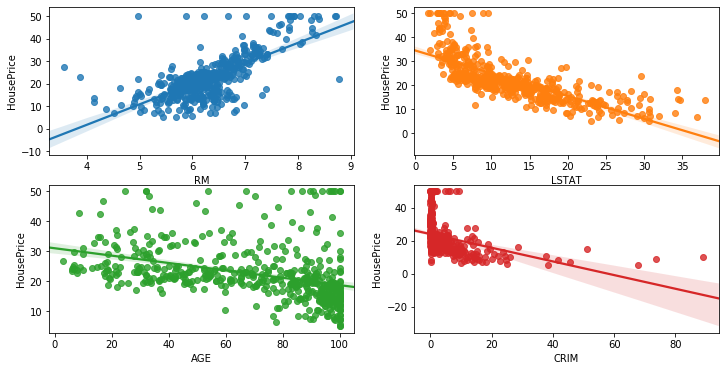

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12, 6))
print(type(axs))
print(axs.shape)
sns.regplot(x='RM', y='HousePrice', data=full_data, ax=axs[0][0])
sns.regplot(x='LSTAT', y='HousePrice', data=full_data, ax=axs[0][1])

sns.regplot(x='AGE', y='HousePrice', data=full_data, ax=axs[1][0])
sns.regplot(x='CRIM', y='HousePrice', data=full_data, ax=axs[1][1])

#After observing here we see that RM room size is linaerly related to the HousePrice and LSTAT %lower status of the populaton shows a linear decay  with HousePrice
Also Age and CRIM shows linear decay but in Age the data is scattered around  and CRIM cime rate shows decrease in crime rate with decrease in rate of HousePrice

In [16]:
#MAchine Learning starts here

# Simple Linear Regression

Taking RM Rom Size for buliding Simple Linear Regression Model

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X1=X[['RM']]
X_train, X_test,Y_train,Y_test=train_test_split(X1,Y, test_size=0.3, random_state=46)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
slm=LinearRegression()
#fit the model
slm.fit(X_train,Y_train)
#print coefficient and intercept
print("Coefficient (m):", slm.coef_,"Intercept (c):", slm.intercept_)

Coefficient (m): [[8.65699392]] Intercept (c): [-31.68373351]


In [21]:
#predicting the price
Y_pred = slm.predict(X_test) 
print("Predicted values:\n ",Y_pred[:4])
print("Actual values:\n",full_data[['RM','HousePrice']][:4])

Predicted values:
  [[21.05467346]
 [26.47395166]
 [24.03267937]
 [21.1499004 ]]
Actual values:
       RM  HousePrice
0  6.575        24.0
1  6.421        21.6
2  7.185        34.7
3  6.998        33.4


In [22]:
#Checking the error using MSE- Mean Squared Error and percent of variation using r2_score
#We have got predicted value of house prices in our test data---Y_pred
#We also have the true value of house prices in test data---Y_test
from sklearn.metrics import mean_squared_error, r2_score
# MSE
print("Mean squared error:", mean_squared_error(Y_test,Y_pred))

# R2 score
r2_slm=r2_score(Y_test,Y_pred)
print("R2 score:",r2_slm)

#Adjusted R2 Score
p=1
n=506
Adj_r2_slm = 1-(1-r2_slm)*(n-1)/(n-p-1)
print("Adjusted R2_score:", Adj_r2_slm)

Mean squared error: 36.84781383525968
R2 score: 0.5131433805544605
Adjusted R2_score: 0.5121773951984178


In [23]:
#Visualizing the Simple Linear Model

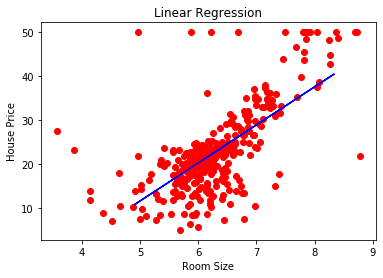

In [24]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_test,Y_pred, color='blue')
plt.title('Linear Regression')
plt.xlabel('Room Size')
plt.ylabel('House Price')
plt.show()

# Multiple Linear Regression

#Taking RM, CRIM, and LSTAT for Multiple Linear Regression
#Here as the datapoints is in between 0-50 so need of scaling/standardizing the data

In [25]:
X2=X[['RM','LSTAT','CRIM']]
Y=full_data['HousePrice']
X2.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


In [26]:
X2_train, X2_test,Y2_train,Y2_test=train_test_split(X2,Y,test_size=0.3, random_state=46)

In [27]:
#fit the model
mlm=LinearRegression()
mlm.fit(X2_train,Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#print the coefficients 
print("Coefficients (m):")
pd.DataFrame(mlm.coef_,index=X2.columns)

Coefficients (m):


,0
RM,5.003574
LSTAT,-0.564283
CRIM,-0.097819


In [29]:
#Print the intercept
print("Intercept:", mlm.intercept_)

Intercept: -1.3353927531564445


In [30]:
#Predicting the values
Y2_pred=mlm.predict(X2_test)
Y2_pred

array([19.48104947, 28.55826155, 21.16899839, 15.36959426, 23.3697696 ,
       21.02018868, 26.72384286, 17.31919052, 10.23997525, 22.19886886,
       29.18263502, 19.01080489, 23.91769354, 17.61072576, 21.31681332,
       28.83089747, 29.69942914, 22.79784876, 23.27772751, 26.25041327,
       21.42640099, 29.78770639, 19.09164656, 24.07018963, 16.15703879,
       26.21846199, 38.92934976, 27.34449497, 16.2742525 , 28.68020744,
       34.98475483, 31.41076602, 17.83751638,  7.63357079, 31.45978894,
       30.46559136, 12.13564703, 20.28126864, 24.21483155, 21.27664667,
       28.28814426, 27.15926749, 28.99161289, 14.90629276, 27.70477301,
       18.31809028, 21.03200647, 21.68014407, 11.14835982, 32.22002993,
       21.04410985, 24.1214655 , 22.02535652, 20.28038058, 26.70752807,
       30.8760271 , 32.1328737 , 18.46869247, 16.56172968, 26.42459004,
       32.76177788, 15.91558316, 17.81885361, 16.08594455, 32.14253949,
       18.63379863, 23.58284426, 25.19908684, 27.73235079, 20.66

In [31]:
#We have got predicted value of house prices in our test data---Y2_pred
#We also have the true value of house prices in test data---Y_test
#Checking the MSE and r2_score

#MSE
print("Root mean Squared Error:",mean_squared_error(Y2_test,Y2_pred))

#r2_score
r2_mlm=r2_score(Y2_test,Y2_pred)
print("R2 score:",r2_mlm)

#Adjusted R2 Score
p=3
n=506
Adj_r2_mlm = 1-(1-r2_mlm)*(n-1)/(n-p-1)
print("Adjusted R2_score:", Adj_r2_mlm)

Root mean Squared Error: 23.62142223305211
R2 score: 0.6878988309511358
Adjusted R2_score: 0.686033684522557


In [32]:
#Visualizing the Multiple Linear Regression model

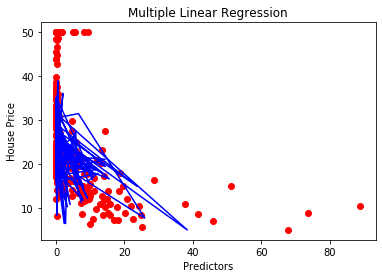

In [33]:
plt.scatter(X2_train['CRIM'],Y2_train, color='red')
plt.plot(X2_test['CRIM'],Y2_pred, color='blue')
plt.title('Multiple Linear Regression')
plt.xlabel('Predictors')
plt.ylabel('House Price')
plt.show()

# Multiple Linear Regression for the whole data after scaling since some data have values for only '0' or '1' 

In [34]:
#Defining the data
X=full_data.drop(['HousePrice'],axis=1)
Y=full_data['HousePrice']

In [35]:
#Standard Scaling the data
from sklearn.preprocessing import StandardScaler
scaler_feature=StandardScaler()
X_scaled=scaler_feature.fit_transform(X)
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [36]:
#Train/test split
X_full_train, X_full_test, Y_full_train,Y_full_test=train_test_split(X_scaled, Y, test_size=0.3, random_state=46)

In [37]:
#Linear Regression Model
lrm=LinearRegression()
lrm.fit(X_full_train, Y_full_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#Finding all the coefficients
pd.DataFrame(lrm.coef_, index=X.columns)

,0
CRIM,-1.055315
ZN,1.233721
INDUS,-0.046737
CHAS,0.736083
NOX,-2.415340
RM,2.566952
AGE,-0.227244
DIS,-3.761732
RAD,2.697188
TAX,-1.883566


In [39]:
#Finding Intercept
lrm.intercept_

22.5432723478734

In [40]:
#Predicting the model
Y_full_pred=lrm.predict(X_full_test)

In [41]:
#Checking the error
#rmse
print("Mean Squared Error:", mean_squared_error(Y_full_test,Y_full_pred))

#r2score
r2_lrm=r2_score(Y_full_test,Y_full_pred)
print("R2_Score:", r2_lrm )

#Adjusted r2_score
p=12
n=506
Adj_r2_lrm = 1-(1-r2_mlm)*(n-1)/(n-p-1)
print("Adjusted R2_score:", Adj_r2_lrm)

Mean Squared Error: 16.139622460029415
R2_Score: 0.7867531011433246
Adjusted R2_score: 0.6803020479316908


# Plotting R2_score and Adj_r2_score for different number of predictors

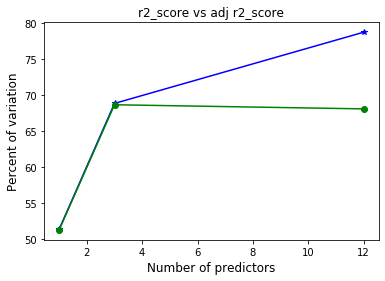

In [42]:
p=[1,3,12]
r2=[r2_slm*100,r2_mlm*100,r2_lrm*100]
adj_r2=[Adj_r2_slm*100,Adj_r2_mlm*100,Adj_r2_lrm*100]
plt.plot(p,r2,'b',label='r2_line',marker='*')
plt.plot(p,adj_r2,'g',label='adj_r2_line',marker='o')
plt.xlabel('Number of predictors', fontsize=12)
plt.ylabel('Percent of variation', fontsize=12)
plt.title('r2_score vs adj r2_score')
plt.show()

#Here we can see as the number of predictors grow the change in r2_score and Adj_r2_score changes drastically